In [47]:
import os
import glob
import scipy
import mat73
import numpy as np
import pylab as pl
import plotting as putil
import utils as util

import seaborn as sns

In [13]:
%matplotlib notebook

In [14]:
plot_style='white'
putil.set_sns_style(style=plot_style)
bg_color='w' if plot_style=='dark' else 'k'

In [219]:
rootdir = '/Volumes/Julie/2p-data'

sess ='20231215'
acq = '20231215_fly1_LC10a-GCaMP8m-001'
cell_color = 'magenta'
# sess ='20240104'
# acq = '20240104_fly1_splitP1-GCaMP8m_OLsimple-005'
cell_color = 'dodgerblue'

sess = 'examples'
acq = 'example-yak-P1-1'
cell_color = 'dodgerblue'
# /Volumes/Julie/2p-data/20231215/processed/figures/20231215_fly1_LC10a-GCaMP8m-001'
if sess == 'examples':
    srcdir = os.path.join(rootdir, sess, acq, 'figures')
else:
    srcdir = os.path.join(rootdir, sess, 'processed', 'figures', acq)
matfile = os.path.join(srcdir, 'plotvars.mat')
assert os.path.exists(matfile)

figdir = srcdir

In [220]:
mat = mat73.loadmat(matfile)

In [221]:
mdata = mat['plotdata']

In [222]:
mdata.keys()

dict_keys(['bTime', 'dFF', 'female_angle', 'firstMotion', 'hDiff', 'iTime', 'ix_firstmotion', 'meanphase', 'meantrial_female_angle', 'meantrial_meanphase_nobas', 'meantrial_tc', 'meantrial_tc_court', 'meantrial_tc_run', 'meantrial_time', 'meantrial_zero_crossings_ix', 'smoothed_dFF', 'smoothed_hDiff', 'timecourse', 'tracking_index'])

In [223]:
for k, v in mdata.items():
    try:
        print(k, v.shape)
    except Exception as e:
        print("Issue with {}".format(k))

bTime (28583,)
dFF (3692,)
female_angle (28583,)
firstMotion ()
hDiff (28582,)
iTime (3692,)
ix_firstmotion (245,)
meanphase (96, 294)
meantrial_female_angle (295,)
meantrial_meanphase_nobas (87, 294)
meantrial_tc (87, 295)
meantrial_tc_court (295,)
meantrial_tc_run (295,)
meantrial_time (295,)
Issue with meantrial_zero_crossings_ix
smoothed_dFF (3692,)
smoothed_hDiff (28582,)
timecourse (3692,)
tracking_index (28582,)


#### behavior: stimulus pos and change in heading
plot(bTime(2:end), hDiff(1:end));
ylim([-0.5, 0.5])
ylabel('\Delta heading')
hold on;
yyaxis right
plot(bTime(2:end), female.angle(2:end))

In [224]:
first_motion_ix = int(mdata['firstMotion'])-1 # indexes into behavior traces
t_start_motion = mdata['bTime'][first_motion_ix]

first_motion_ix_2p = int(mdata['ix_firstmotion'][-1]-1)

In [225]:
fps_behav = 1/np.median(np.diff(mdata['bTime']))
fps_2p = 1/np.median(np.diff(mdata['iTime']))

nsec_pre = 0
nsec_post = 20

#nsec_pre_frames = nsec_pre * fps_behavior
#nsec_post_frames = nsec_post * fps_behavior
ix_start_behav = first_motion_ix - int(round(nsec_pre*fps_behav))
ix_end_behav = first_motion_ix + int(round(nsec_post*fps_behav))
ix_start_2p = first_motion_ix_2p - int(round(nsec_pre*fps_2p))
ix_end_2p = first_motion_ix_2p + int(round(nsec_post*fps_2p))

<IPython.core.display.Javascript object>


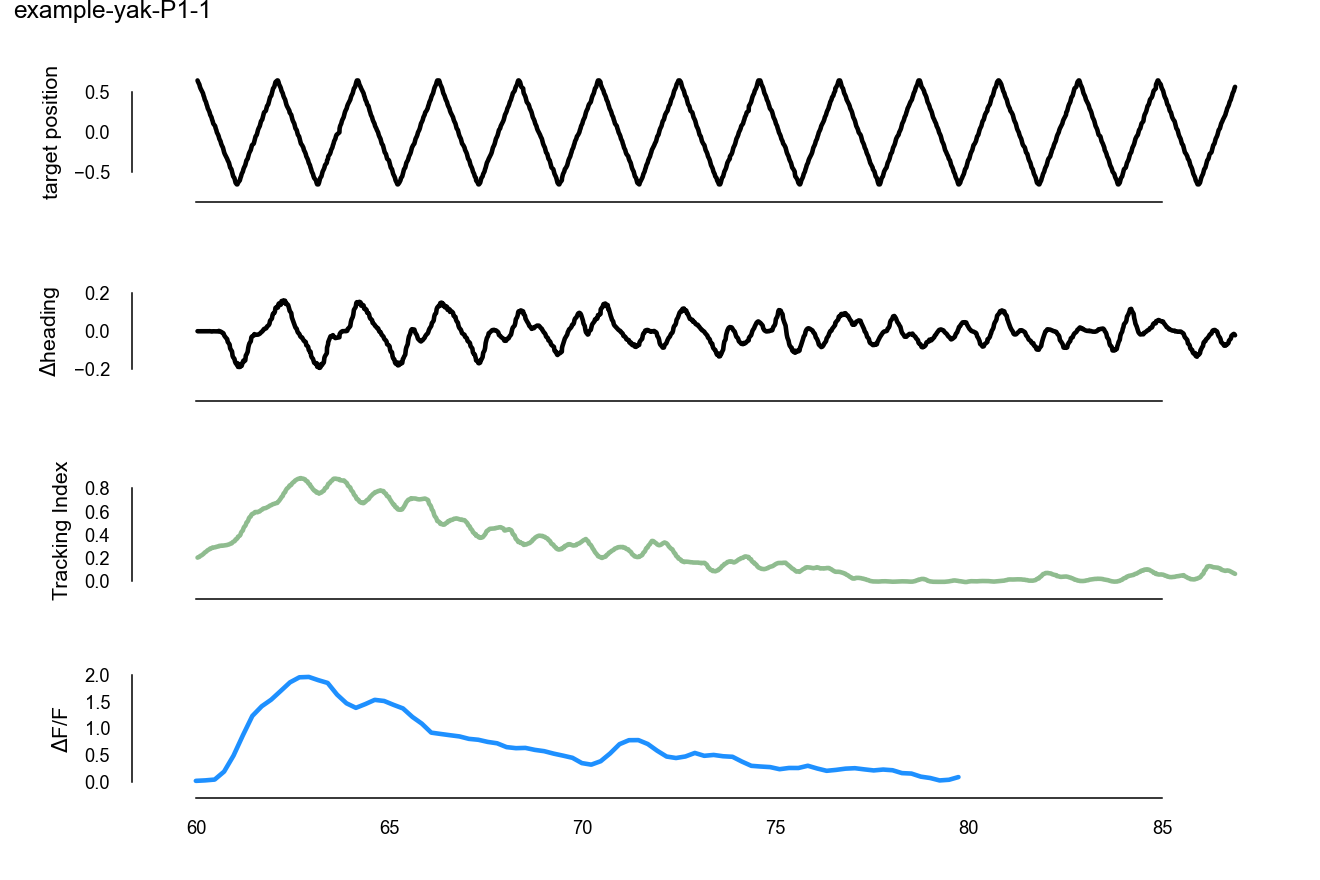

/Volumes/Julie/2p-data/examples/example-yak-P1-1/figures/timecourse-subset_example-yak-P1-1.svg


In [226]:
# t_end_plot_sec = t_start_motion + 60.
# t_start_plot_sec = t_start_motion - 2
# tc_color = 'dodgerblue'
tc_color = cell_color
fig, axn = pl.subplots(4, 1, sharex=True)
ax=axn[0]
ax.set_ylabel('target position')
ax.plot(mdata['bTime'][ix_start_behav+1:ix_end_behav+1], 
        mdata['female_angle'][ix_start_behav:ix_end_behav], 'k') 
ax=axn[1]
ax.set_ylabel('$\Delta$heading')
ax.plot(mdata['bTime'][ix_start_behav+1:ix_end_behav+1], 
        mdata['smoothed_hDiff'][ix_start_behav:ix_end_behav], 'k')
ax.set_ylim([-0.3, 0.3])

ax=axn[2]
ax.set_ylabel('Tracking Index')
ax.plot(mdata['bTime'][ix_start_behav+1:ix_end_behav+1], 
        mdata['tracking_index'][ix_start_behav:ix_end_behav], 'darkseagreen')
ax=axn[3]
ax.set_ylabel('$\Delta$F/F')
ax.plot(mdata['iTime'][ix_start_2p:ix_end_2p], 
        mdata['smoothed_dFF'][ix_start_2p:ix_end_2p], tc_color)

for ax in axn:
    ax.set_box_aspect(0.1)
    #ax.axis('off')
pl.tight_layout()
pl.subplots_adjust(hspace=0)
sns.despine(offset=4, trim=True)

putil.label_figure(fig, acq)

figname = 'timecourse-subset_{}'.format(acq)
pl.savefig(os.path.join(figdir, '{}.svg'.format(figname)))
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(os.path.join(figdir, '{}.svg'.format(figname)))

#### plot average trial

<IPython.core.display.Javascript object>


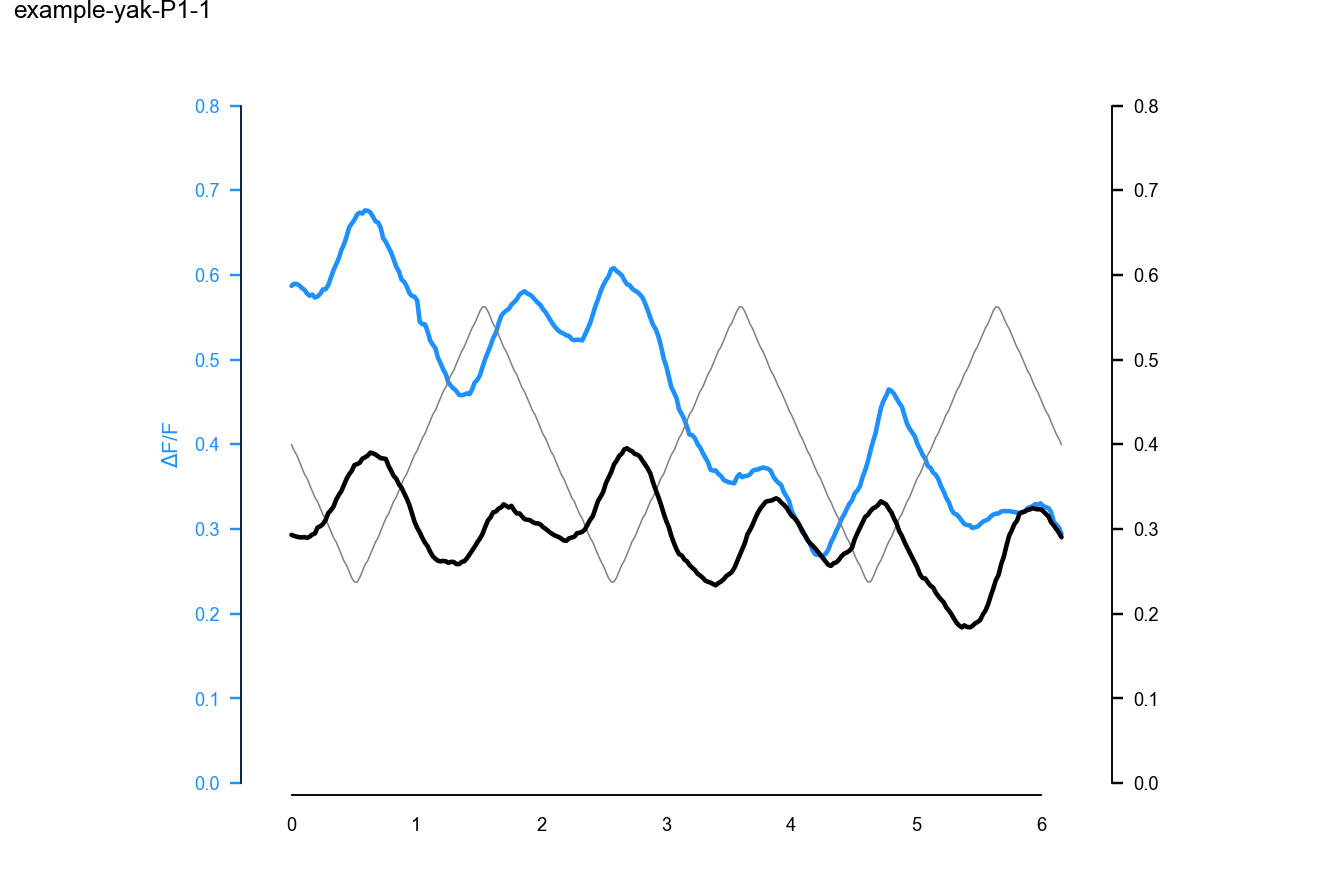

/Volumes/Julie/2p-data/examples/example-yak-P1-1/figures/avg-trial-court-v-run_example-yak-P1-1.svg


In [235]:
# mnCrt = mean(trialTC(crt,:))'; hold on;
# plot(mnTime, mnCrt,'
# tc_color = 'dodgerblue'
tc_color = cell_color
fig, ax =pl.subplots(sharey=True)
ax.plot(mdata['meantrial_time'], mdata['meantrial_tc_court'], tc_color)
ax.set_ylabel('$\Delta$F/F', color=tc_color)
ax.tick_params(axis='y', colors=tc_color)
ax.spines['left'].set_color(tc_color)

ax2 = ax.twinx()
offset = 0.4
ax2.plot(mdata['meantrial_time'], mdata['meantrial_female_angle']/4 + offset, 'gray', lw=0.5)
ax2.plot(mdata['meantrial_time'], mdata['meantrial_tc_run'], 'k')

ax2.spines['right'].set_color('k')

for ax in fig.axes:
    ax.set_ylim([-0, 0.8])

sns.despine(top=True, right=False, offset=4, trim=True)
ax.set_box_aspect(0.8)

putil.label_figure(fig, acq)
figname = 'avg-trial-court-v-run_{}'.format(acq)
pl.savefig(os.path.join(figdir, '{}.svg'.format(figname)))
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))
print(os.path.join(figdir, '{}.svg'.format(figname)))